# 6.4 Supervised Regression

### This contains the following:

#### 1. Importing Visualization Libraries and Data 
#### 2. Data Cleaning
#### 3. Data prep for regression analysis
#### 4. Regression analysis
#### Hypothesis and future thoughts

### 1. Importing Visualization Libraries and Data

In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
%matplotlib inline

In [5]:
#creating pathway for dataframes
path = os.path.join(r'/Users/katja/Documents/Airbnb/02 Data')

In [6]:
#import Airbnb Amsterdam csv
df = pd.read_csv(os.path.join(path, 'Prepared Data','2023_Amsterdam_Airbnb_Data_updated.csv'), index_col = False)

In [7]:
#loading garbage collector
import gc

### 2. Data Cleaning

In [17]:
df.columns

Index(['listing_id', 'host_id', 'host_listings_count', 'host_since',
       'host_response_time', 'host_response_rate', 'host_is_superhost',
       'host_has_profile_pic', 'neighbourhood', 'latitude', 'longitude',
       'property_type', 'room_type', 'property_accommodates', 'price',
       'minimum_nights', 'maximum_nights', 'availability_365',
       'number_of_reviews', 'reviews_per_month', 'number_of_reviews_ltm',
       'first_review', 'last_review', 'review_scores_rating',
       'review_scores_location', 'review_scores_communication',
       'Airbnb Availability', 'airbnb availability', 'price category',
       'neigbourhood'],
      dtype='object')

In [18]:
df.head(20)

,listing_id,host_id,host_listings_count,host_since,host_response_time,host_response_rate,host_is_superhost,host_has_profile_pic,neighbourhood,latitude,...,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_location,review_scores_communication,Airbnb Availability,airbnb availability,price category,neigbourhood
0,2818,3159,1,2008/09/24,within an hour,100,Superhost,Host Profile Pic,Oostelijk Havengebied Indische Buurt,52.364350,...,51,2009/03/30,2023/11/27,4.90,4.71,4.98,No Availability,No Availability,low price,Oostelijk Havengebied Indische Buurt
1,20168,59484,2,2009/12/02,within an hour,100,Not a Superhost,Host Profile Pic,CentrumOost,52.364070,...,30,2010/03/02,2023/12/10,4.44,4.88,4.61,No Availability,No Availability,middle price,CentrumOost
2,27886,97647,1,2010/03/23,within an hour,100,Superhost,Host Profile Pic,CentrumWest,52.387610,...,24,2012/01/09,2023/11/19,4.93,4.89,4.92,No Availability,No Availability,middle price,CentrumWest
3,28871,124245,2,2010/05/13,within an hour,100,Superhost,Host Profile Pic,CentrumWest,52.367750,...,116,2010/08/22,2023/12/10,4.87,4.94,4.93,No Availability,No Availability,low price,CentrumWest
4,29051,124245,2,2010/05/13,within an hour,100,Superhost,Host Profile Pic,CentrumOost,52.365840,...,97,2011/03/16,2023/12/08,4.81,4.88,4.92,No Availability,No Availability,low price,CentrumOost
5,48373,220434,1,2010/09/01,within a few hours,100,Not a Superhost,Host Profile Pic,Buitenveldert Zuidas,52.327808,...,2,2023/07/21,2023/11/07,5.00,5.00,5.00,No Availability,No Availability,middle price,Buitenveldert Zuidas
6,49552,225987,1,2010/09/06,within a few hours,100,Superhost,Host Profile Pic,CentrumWest,52.380280,...,64,2010/10/29,2023/12/07,4.93,4.98,4.97,No Availability,No Availability,high price,CentrumWest
7,50263,230246,1,2010/09/10,within an hour,83,Not a Superhost,Host Profile Pic,CentrumOost,52.371180,...,7,2010/10/13,2023/05/29,4.87,4.66,4.76,All Year Availability,All Year Availability,high price,CentrumOost
8,50523,231946,1,2010/09/12,within a few hours,100,Superhost,Host Profile Pic,CentrumWest,52.368110,...,70,2011/01/04,2023/11/23,4.88,4.95,4.83,No Availability,No Availability,middle price,CentrumWest
9,53921,252245,1,2010/10/03,within a few hours,100,Not a Superhost,Host Profile Pic,IJburg Zeeburgereiland,52.355590,...,7,2018/10/28,2023/11/12,5.00,5.00,5.00,No Availability,No Availability,middle price,IJburg Zeeburgereiland


#### Check for missing values

In [8]:
# Check for missing values

df.isnull().sum()

# No missing values to handle

listing_id                     0
host_id                        0
host_listings_count            0
host_since                     0
host_response_time             0
host_response_rate             0
host_is_superhost              0
host_has_profile_pic           0
neighbourhood                  0
latitude                       0
longitude                      0
property_type                  0
room_type                      0
property_accommodates          0
price                          0
minimum_nights                 0
maximum_nights                 0
availability_365               0
number_of_reviews              0
reviews_per_month              0
number_of_reviews_ltm          0
first_review                   0
last_review                    0
review_scores_rating           0
review_scores_location         0
review_scores_communication    0
Airbnb Availability            0
airbnb availability            0
price category                 0
neigbourhood                   0
dtype: int

#### Checking for duplicates

In [14]:
dups = df.duplicated()

In [15]:
dups.shape # No dups

(5050,)

### 3. Data prep for regression analysis

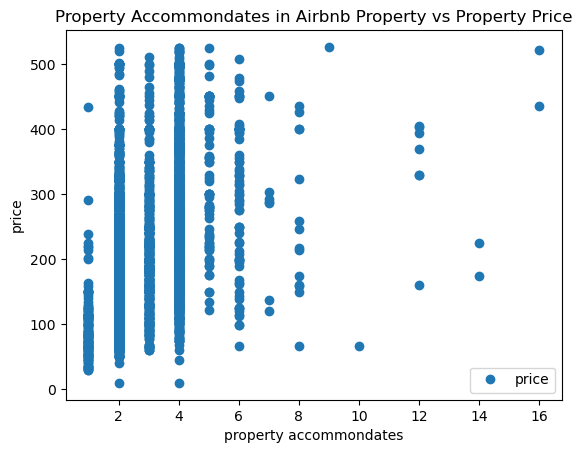

In [29]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'property_accommodates', y='price',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Property Accommondates in Airbnb Property vs Property Price')  
plt.xlabel('property accommondates')  
plt.ylabel('price')  
plt.show()

This time I want to have a look at the property accommondates vs the property price again. 

#### Hypothesis: If the amount of property accommondates of an Airbnb property influences the property price meaning if the property accomnmondates amount goes up the property price also increases. 


In [21]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['property_accommodates'].values.reshape(-1,1)
y = df['price'].values.reshape(-1,1)

In [22]:
X

array([[2],
       [2],
       [2],
       ...,
       [2],
       [1],
       [3]])

In [23]:
y

array([[ 69.],
       [117.],
       [155.],
       ...,
       [150.],
       [ 81.],
       [216.]])

In [24]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### Regression Analysis

#### Run a linear regression on the data

In [26]:
# Create a regression object.

regression = LinearRegression()  

In [27]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [28]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

### Creating a plot that shows the regression line on the test set

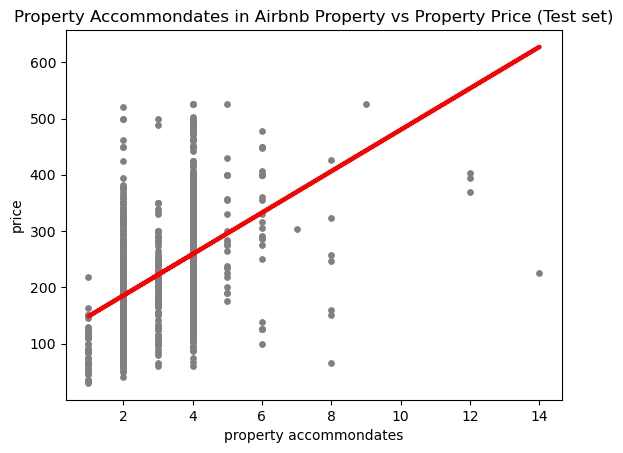

In [30]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Property Accommondates in Airbnb Property vs Property Price (Test set)')
plot_test.xlabel('property accommondates')
plot_test.ylabel('price')
plot_test.show()

#### Write your own interpretation of how well the line appears to fit the data in a markdown cell.

Examining the exercise notes reveals that linear regression aims to draw a straight line through the given data points in an effort to identify the best-fit line, which maximally intersects with the data.

Observing the chart above, it is evident that the regression line fails to encompass all data points. Specifically, there is a denser cluster between 0 and 6.

#### Model's summary statistic

In [32]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) #  mean squared error
r2 = r2_score(y_test, y_predicted) #  R2 score

In [33]:
# Print the model summary statistics to evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[36.83911087]]
Mean squared error:  8435.57964912111
R2 score:  0.24286621665848207


#### Check the model performance statistics—MSE and R2.
Slope: Indicating how the 'price' variable (y) changes with variations in the 'accommodates' variable (X), the slope reflects that an increase in accommodates quantity withihn a Airbnb property corresponds to a rise in property price, with a magnitude of 36.83.

MSE: The relatively large Mean Squared Error (MSE) suggests that regression may not be the most suitable model for representing this dataset.

R2: Proximity to 0 signifies a suboptimal fit, while values closer to 1 suggest a more effective fit. With an R2 value of 0.24, the indication is that the fit is not strong in this context, leaning towards a poor fit.

### Manual Check

In [35]:
y_predicted

array([[185.19139956],
       [185.19139956],
       [185.19139956],
       ...,
       [258.86962131],
       [185.19139956],
       [258.86962131]])

In [36]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,300.0,185.191400
1,86.0,185.191400
2,111.0,185.191400
3,204.0,185.191400
4,175.0,185.191400
5,186.0,185.191400
6,236.0,258.869621
7,106.0,222.030510
8,200.0,258.869621
9,270.0,185.191400


## Compare how the regression fits the training set

In [37]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [38]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [39]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[36.83911087]]
Mean squared error:  8578.523885662073
R2 score:  0.18499281847689641


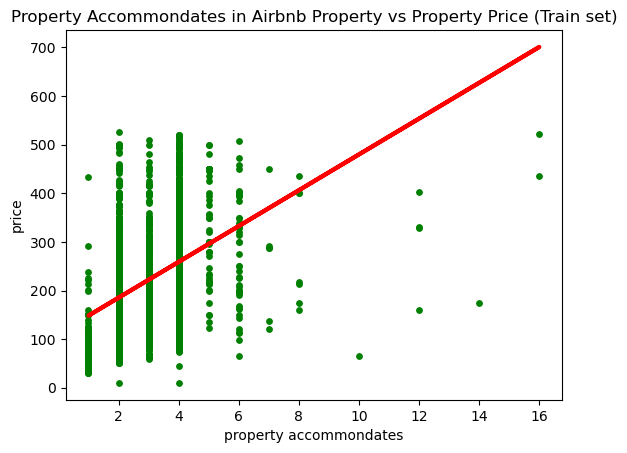

In [40]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Property Accommondates in Airbnb Property vs Property Price (Train set)')
plot_test.xlabel('property accommondates')
plot_test.ylabel('price')
plot_test.show()

I got a slightly higher R2 score on the training set and a lower R2 score on the test set, indicating that my model may have overfit.

R2 (Training Set): 0.24

R2 (Test Set): 0.18

As a result, I am inclined to reject my hypothesis, which suggested a correlation between the number of property accommodates in an Airbnb property and the property price. The data suggests that an increase in the number of property accommodates may not consistently lead to a corresponding increase in property price.


### Include your thoughts on how well the model performed on the test set in a markdown cell. Include any reflections you have on the impact of possible data bias.

The model's performance on the test set was unsatisfactory, suggesting that it lacks the sophistication to accurately predict prices based on property accommodates. It implies that there may be other, more influential factors that should be explored for more reliable predictions.

Potential biases: Potential biases should be considered as hosts with specific property types might be more or less inclined to engage with Airbnb. This could result in a biased distribution of property types and, consequently, impact the ability to host a certain number of accommodates of Airbnb property listings.
